#### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Importing the data from csv file

In [2]:
df = pd.read_csv('Unemployment in india.csv')

#### EDA

In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


#### Checking the shape of the data

In [4]:
df.shape

(768, 7)

#### Checking for type of features

In [5]:
df.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

#### Checking for NUll values if any

In [6]:
df.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

#### Dropping the NAN values

In [7]:
df.dropna(inplace = True)

In [8]:
df.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [9]:
df.shape

(740, 7)

In [10]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

#### Statisitcal Description of the data

In [38]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [49]:
df.corr()

C:\Users\saite\AppData\Local\Temp\ipykernel_18776\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
Estimated Unemployment Rate (%),1.000000,-0.222876,0.002558
Estimated Employed,-0.222876,1.000000,0.011300
Estimated Labour Participation Rate (%),0.002558,0.011300,1.000000


-> Estimates Unemployment Rate and Estimated employement rate are negatively correalted which means if one goes high another will go in the opposite direction
-> Estimated Labour Participationi Rate is almost near to 0 for both Estimated Unemployment rate and Estimate Employed so it has almost no correalatin with that features

#### Coverting Date to Datetime format from Object type

In [11]:
df[' Date'] = pd.to_datetime(df[' Date'])

In [12]:
df.dtypes

Region                                              object
 Date                                       datetime64[ns]
 Frequency                                          object
 Estimated Unemployment Rate (%)                   float64
 Estimated Employed                                float64
 Estimated Labour Participation Rate (%)           float64
Area                                                object
dtype: object

In [13]:
df.head(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural


#### Checking for unique values

In [14]:
df[' Frequency'].unique()

array([' Monthly', 'Monthly'], dtype=object)

In [15]:
df['Area'].unique()

array(['Rural', 'Urban'], dtype=object)

#### Dropping Frequency column as it does not had any weightage to the analysis

In [16]:
df.drop(columns = [' Frequency'],inplace = True)
df.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural


#### Understanding the unemployement rate of Andhra Pradesh with respective date feature

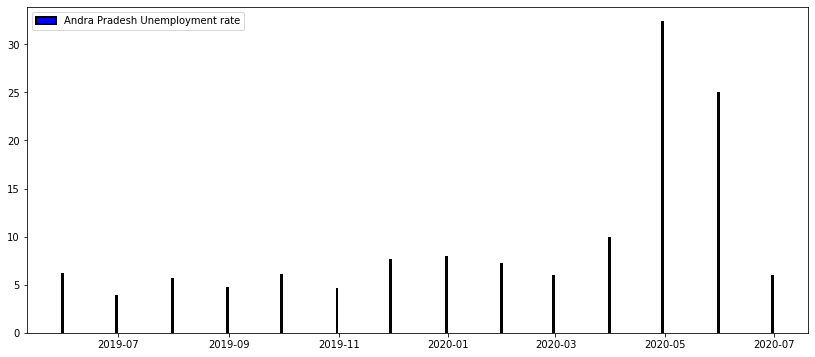

In [106]:
plt.figure(figsize=(14, 6))
plt.bar(df[df.Region == 'Andhra Pradesh'][' Date'],df[df.Region == 'Andhra Pradesh'][' Estimated Unemployment Rate (%)'],color='b', width=0.5, edgecolor='k', linewidth=2, label='Andra Pradesh Unemployment rate')
plt.legend()

##### When covid hit we can see that unemployement rate is max in AP in month of may 2020. Then the rate is continued to be high and graduually decreasing as the situation becoming normal for business all over the world

#### If we compare rural to urban unemployement rate, it is high in rural areas as agriculture is continued some means where the jobs cant be taken due to lockdown things all over the country

<BarContainer object of 28 artists>

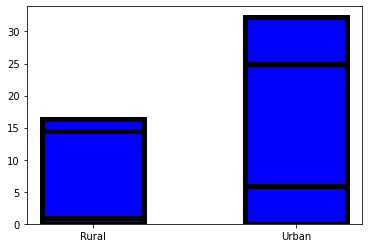

In [172]:
plt.bar(df[df.Region == 'Andhra Pradesh']['Area'],df[df.Region == 'Andhra Pradesh'][' Estimated Unemployment Rate (%)'],color='b', width=0.5, edgecolor='k', linewidth=5, label='Andra Pradesh Unemployment rate')

#### Comparision of unemployment rate of Ap with Area feature

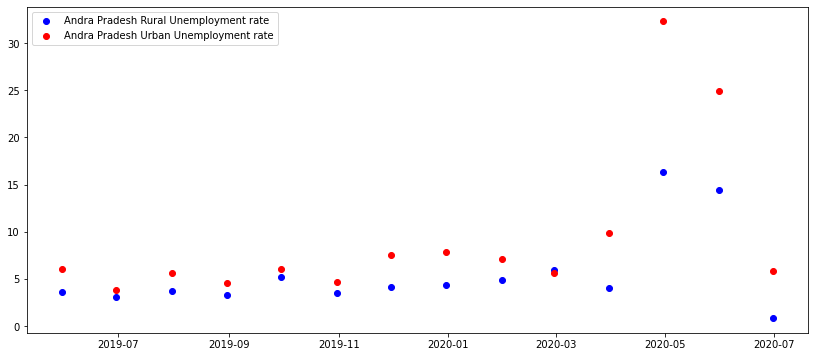

In [37]:
plt.figure(figsize=(14, 6))
plt.scatter(df[(df['Region'] == 'Andhra Pradesh') & (df['Area'] == 'Rural')][' Date'],df[(df['Region'] == 'Andhra Pradesh') & (df['Area'] == 'Rural')][' Estimated Unemployment Rate (%)'],color='b', label='Andra Pradesh Rural Unemployment rate')
plt.scatter(df[(df['Region'] == 'Andhra Pradesh') & (df['Area'] == 'Urban')][' Date'],df[(df['Region'] == 'Andhra Pradesh') & (df['Area'] == 'Urban')][' Estimated Unemployment Rate (%)'],color='r', label='Andra Pradesh Urban Unemployment rate')
plt.legend()

-> We can observe that urban unemployement rate is always greater than the rural as rural depends mostly on agriculture jobs. 
-> The rural has greatest of the unemployment when covid hit i.e in May-2020 but not have greater values than urban jobs.
-> For whole AP the unemployment if high in urban and started to decline a bit when compared to covid hit but not that exponetial. 
-> whereas Rural sector recoverd well a bit

#### Creating dataframes for data before covid and after covid based on area


In [75]:
before_covid_rural = df[(df['Area'] == 'Rural') & (~df[' Date'].isin(['2020-03-31','2020-04-30','2020-05-31', '2020-06-30']))]
before_covid_urban = df[(df['Area'] == 'Urban') & (~df[' Date'].isin(['2020-03-31','2020-04-30','2020-05-31', '2020-06-30']))]
after_covid_rural = df[(df['Area'] == 'Rural') & (df[' Date'].isin(['2020-03-31','2020-04-30','2020-05-31', '2020-06-30']))]
after_covid_urban = df[(df['Area'] == 'Urban') & (df[' Date'].isin(['2020-03-31','2020-04-30','2020-05-31', '2020-06-30']))]

##### Before  and covid in rural areas unemployment rate stats

\

In [150]:
temp1 = before_covid_rural[before_covid_rural[' Estimated Unemployment Rate (%)'] ==before_covid_rural[' Estimated Unemployment Rate (%)'].max()]
temp2 = before_covid_rural[before_covid_rural[' Estimated Unemployment Rate (%)'] ==before_covid_rural[' Estimated Unemployment Rate (%)'].min()]
temp3 = after_covid_rural[after_covid_rural[' Estimated Unemployment Rate (%)'] ==after_covid_rural[' Estimated Unemployment Rate (%)'].max()]
temp4 = after_covid_rural[after_covid_rural[' Estimated Unemployment Rate (%)'] ==after_covid_rural[' Estimated Unemployment Rate (%)'].min()]

In [145]:
print("MAXIMUM unemployment rate before Covid in Rural is in state of *",temp1.Region,'*with Estimated uNemployment rate of',temp1[' Estimated Unemployment Rate (%)'])
print()
print("*******")
print("MINIMUM unemployment rate before Covid in Rural is in state of *",temp2.Region.iloc[0],' * and * ',temp2.Region.iloc[1],'* with Estimated uNemployment rate of',temp2[' Estimated Unemployment Rate (%)'].iloc[:1])

MAXIMUM unemployment rate before Covid in Rural is in state of * 312    Tripura
Name: Region, dtype: object *with Estimated uNemployment rate of 312    31.91
Name:  Estimated Unemployment Rate (%), dtype: float64

*******
MINIMUM unemployment rate before Covid in Rural is in state of * Goa  * and *  Puducherry * with Estimated uNemployment rate of 77    0.0
Name:  Estimated Unemployment Rate (%), dtype: float64


In [151]:
print("MAXIMUM unemployment rate after Covid in Rural is in state of *",temp3.Region,'*with Estimated uNemployment rate of',temp3[' Estimated Unemployment Rate (%)'])
print()
print("*******")
print("MINIMUM unemployment rate after Covid in Rural is in state of *",temp4.Region.iloc[0],' * and * ',temp4.Region.iloc[1],'* with Estimated uNemployment rate of',temp4[' Estimated Unemployment Rate (%)'].iloc[:1])

MAXIMUM unemployment rate after Covid in Rural is in state of * 242    Puducherry
Name: Region, dtype: object *with Estimated uNemployment rate of 242    74.51
Name:  Estimated Unemployment Rate (%), dtype: float64

*******
MINIMUM unemployment rate after Covid in Rural is in state of * Assam  * and *  Chhattisgarh * with Estimated uNemployment rate of 25    0.0
Name:  Estimated Unemployment Rate (%), dtype: float64


#####  before and after covid the unemployment rate stats

In [152]:
temp1 = before_covid_urban[before_covid_urban[' Estimated Unemployment Rate (%)'] ==before_covid_urban[' Estimated Unemployment Rate (%)'].max()]
temp2 = before_covid_urban[before_covid_urban[' Estimated Unemployment Rate (%)'] ==before_covid_urban[' Estimated Unemployment Rate (%)'].min()]
temp3 = after_covid_urban[after_covid_urban[' Estimated Unemployment Rate (%)'] ==after_covid_urban[' Estimated Unemployment Rate (%)'].max()]
temp4 = after_covid_urban[after_covid_urban[' Estimated Unemployment Rate (%)'] ==after_covid_urban[' Estimated Unemployment Rate (%)'].min()]

In [153]:
print("MAXIMUM unemployment rate before Covid in Urban is in state of *",temp1.Region,'*with Estimated uNemployment rate of',temp1[' Estimated Unemployment Rate (%)'])
print()
print("*******")
print("MINIMUM unemployment rate before Covid in Urban is in state of *",temp2.Region.iloc[0],' * and * ',temp2.Region.iloc[1],'* with Estimated uNemployment rate of',temp2[' Estimated Unemployment Rate (%)'].iloc[:1])

MAXIMUM unemployment rate before Covid in Urban is in state of * 698    Tripura
Name: Region, dtype: object *with Estimated uNemployment rate of 698    34.69
Name:  Estimated Unemployment Rate (%), dtype: float64

*******
MINIMUM unemployment rate before Covid in Urban is in state of * Puducherry  * and *  Puducherry * with Estimated uNemployment rate of 617    0.0
Name:  Estimated Unemployment Rate (%), dtype: float64


In [155]:
print("MAXIMUM unemployment rate after Covid in URBAN is in state of *",temp3.Region,'*with Estimated uNemployment rate of',temp3[' Estimated Unemployment Rate (%)'])
print()
print("*******")
print("MINIMUM unemployment rate after Covid in URBAN is in state of *",temp4.Region.iloc[0],' * and * ','* with Estimated uNemployment rate of',temp4[' Estimated Unemployment Rate (%)'].iloc[:1])

MAXIMUM unemployment rate after Covid in URBAN is in state of * 627    Puducherry
Name: Region, dtype: object *with Estimated uNemployment rate of 627    76.74
Name:  Estimated Unemployment Rate (%), dtype: float64

*******
MINIMUM unemployment rate after Covid in URBAN is in state of * Puducherry  * and *  * with Estimated uNemployment rate of 626    0.62
Name:  Estimated Unemployment Rate (%), dtype: float64


In [117]:
before_covid_rural.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,260.000000,2.600000e+02,260.000000
mean,8.094808,1.053284e+07,45.562538
std,6.737296,1.007413e+07,8.410931
min,0.000000,1.354070e+05,32.710000
25%,3.695000,2.023695e+06,39.802500
50%,5.790000,7.900569e+06,43.210000
75%,10.822500,1.504344e+07,48.507500
max,31.910000,4.577751e+07,72.570000


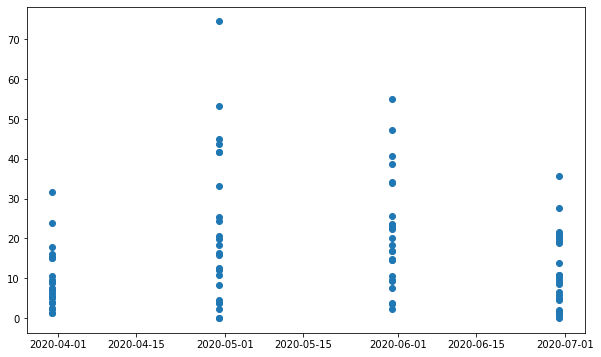

In [78]:
plt.figure(figsize=(10,6))
plt.scatter(after_covid_rural[' Date'],after_covid_rural[' Estimated Unemployment Rate (%)'])

#### INSIGHTS FroM THE DATA

-> The overall unemployment rate is minimum in Pondicherry and Goa before coivd with 0.0%
-> The overall Unemployment rate is maximum in Podicherry after covid with 76.74%
-> Pondicherry is the most effected state according to the stats
-> well recovered states in rural area after covid are Assam and Chattisgarh
-> on compared to rural areas urban areas are most effected by covid 
-> As rural people depend on agriculture jobs most of them survived the covid as agriculture is given priority to work during lockdown
-> while Urban people lost their jobs and the unemployment rate increased in covid hit months like April,May and june where the first lockdown initiated.
